In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
from random import randrange
from scipy.stats import linregress
# Study data files
path = "../Resources/backloggd_games.csv"

# Read the mouse data and the study results
game_df = pd.read_csv(path)

# Display the data table for preview
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [2]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   Title         60000 non-null  object 
 2   Release_Date  60000 non-null  object 
 3   Developers    60000 non-null  object 
 4   Summary       55046 non-null  object 
 5   Platforms     60000 non-null  object 
 6   Genres        60000 non-null  object 
 7   Rating        25405 non-null  float64
 8   Plays         60000 non-null  object 
 9   Playing       60000 non-null  object 
 10  Backlogs      60000 non-null  object 
 11  Wishlist      60000 non-null  object 
 12  Lists         60000 non-null  object 
 13  Reviews       60000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.4+ MB


In [3]:
game_df.Developers.nunique()

18356

In [4]:
game_df.Developers.value_counts()

Developers
[]                                        18091
['Konami']                                  470
['Nintendo']                                325
['Capcom']                                  318
['Sega']                                    185
                                          ...  
['NanoPiko Games', 'Plug In Digital']         1
['DevCubeStudio', 'Fibrum Limited']           1
['TeamFatBears']                              1
['Blueside', 'Microsoft Game Studios']        1
['Travian Games', 'Shadow Masters']           1
Name: count, Length: 18356, dtype: int64

In [5]:
game_df.Title.value_counts()

Title
Date A Live Twin Edition: Rio Reincarnation            24
Tube                                                   21
Yakiniku Bugyou                                        20
The Store is Closed                                    20
Nonogram Survival                                      19
                                                       ..
Spider-Man: Homecoming - Virtual Reality Experience     1
Hammerfight                                             1
Team USA Basketball                                     1
Syvalion                                                1
Orbit - Playing with Gravity                            1
Name: count, Length: 40985, dtype: int64

In [6]:
game_df.Title.nunique()

40985

In [7]:
game_df['Developers']=game_df['Developers'].str.split(',').str[0]
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022",['FromSoftware',"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",['Nintendo',The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015",['tobyfox',"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [8]:
game_df["Developers"] = game_df["Developers"].astype(str)
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022",['FromSoftware',"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",['Nintendo',The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015",['tobyfox',"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [9]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   Title         60000 non-null  object 
 2   Release_Date  60000 non-null  object 
 3   Developers    60000 non-null  object 
 4   Summary       55046 non-null  object 
 5   Platforms     60000 non-null  object 
 6   Genres        60000 non-null  object 
 7   Rating        25405 non-null  float64
 8   Plays         60000 non-null  object 
 9   Playing       60000 non-null  object 
 10  Backlogs      60000 non-null  object 
 11  Wishlist      60000 non-null  object 
 12  Lists         60000 non-null  object 
 13  Reviews       60000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.4+ MB


In [10]:
game_df["Developers"] = game_df["Developers"].apply(lambda x: str(x).lstrip("['")) #TA Mike came up with this code
game_df["Developers"] = game_df["Developers"].apply(lambda x: str(x).rstrip("']"))
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022",FromSoftware,"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",Nintendo,The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",Team Cherry,A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015",tobyfox,"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [11]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    60000 non-null  int64  
 1   Title         60000 non-null  object 
 2   Release_Date  60000 non-null  object 
 3   Developers    60000 non-null  object 
 4   Summary       55046 non-null  object 
 5   Platforms     60000 non-null  object 
 6   Genres        60000 non-null  object 
 7   Rating        25405 non-null  float64
 8   Plays         60000 non-null  object 
 9   Playing       60000 non-null  object 
 10  Backlogs      60000 non-null  object 
 11  Wishlist      60000 non-null  object 
 12  Lists         60000 non-null  object 
 13  Reviews       60000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.4+ MB


In [12]:
# Use a for loop to change to columns (Plays, Playing, Backlogs, Wishlist, Lists, and Reviews)
# Use an replace statement to any change any value with 'K' to a float, multiply that by 1,000, and then change the entire column to integers

cols = ('Plays', 'Playing', 'Backlogs', 'Wishlist', 'Lists', 'Reviews')

for col in cols:
    # Apply a lambda function to replace ‘K’ and multiply by 1000 if ‘K’ is present
    game_df[col] = game_df[col].apply(lambda x: float(str(x).replace('K', '')) * 1000 if 'K' in str(x) else int(x))

game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022",FromSoftware,"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",Nintendo,The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0
2,2,Hades,"Dec 07, 2018",Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0
3,3,Hollow Knight,"Feb 24, 2017",Team Cherry,A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0
4,4,Undertale,"Sep 15, 2015",tobyfox,"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0


In [13]:
# Change Release_Date to datetime, had to adjust for TBD values so changed them to NaT (Not a Time) function

game_df['Release_Date'] = game_df['Release_Date'].str.replace('TBD', 'NaT')
game_df['Release_Date'] = pd.to_datetime(game_df['Release_Date'])

In [14]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    60000 non-null  int64         
 1   Title         60000 non-null  object        
 2   Release_Date  51981 non-null  datetime64[ns]
 3   Developers    60000 non-null  object        
 4   Summary       55046 non-null  object        
 5   Platforms     60000 non-null  object        
 6   Genres        60000 non-null  object        
 7   Rating        25405 non-null  float64       
 8   Plays         60000 non-null  float64       
 9   Playing       60000 non-null  float64       
 10  Backlogs      60000 non-null  float64       
 11  Wishlist      60000 non-null  float64       
 12  Lists         60000 non-null  float64       
 13  Reviews       60000 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(5)
memory usage: 6.4+ MB


In [15]:
game_df['Platforms'] = game_df['Platforms'].str.split(',')
game_df['Genres'] = game_df['Genres'].str.split(',')

In [16]:
# After converting those columns into a list, I could now continue with creating a code that can count the Platforms and Genres, then put them in new columns.
# I thought that maybe len(x) could work, it failed, then tried .apply len(x), which also failed.
# There was no specific function to accomplish what I needed, which reminded me of lambda, which I had previously looked up because the TA had given the group a lambda function before.
# After repeated trial and error I finally came up with the code below.
# ".apply" applies all the things in the () to the Platforms column. 
# "lambda x:" is used because "lambda", x, and colon, must be used in that order to start the lambda function.
# "len(x)" is used to count the x or elements within the cell.
platform_counts = game_df['Platforms'].apply(lambda x: len(x))
genre_counts = game_df['Genres'].apply(lambda x: len(x))

# Adding new columns for platform and genre counts through the use of brackets..
game_df['Platform_Count'] = platform_counts
game_df['Genre_Count'] = genre_counts

game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count
0,0,Elden Ring,2022-02-25,FromSoftware,"Elden Ring is a fantasy, action and open world...","[['Windows PC', 'PlayStation 4', 'Xbox One',...","[['Adventure', 'RPG']]",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0,5,2
1,1,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"[['Wii U', 'Nintendo Switch']]","[['Adventure', 'Puzzle']]",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0,2,2
2,2,Hades,2018-12-07,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"[['Windows PC', 'Mac', 'PlayStation 4', 'Xb...","[['Adventure', 'Brawler', 'Indie', 'RPG']]",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0,7,4
3,3,Hollow Knight,2017-02-24,Team Cherry,A 2D metroidvania with an emphasis on close co...,"[['Windows PC', 'Mac', 'Linux', 'Nintendo S...","[['Adventure', 'Indie', 'Platform']]",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0,4,3
4,4,Undertale,2015-09-15,tobyfox,"A small child falls into the Underground, wher...","[['Windows PC', 'Mac', 'Linux', 'PlayStatio...","[['Adventure', 'Indie', 'RPG', 'Turn Based ...",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0,7,4


In [17]:
# Now that the list was done, I need to convert back to a string so I could use str.replace (as was originally planned but would change) to get rid of the extra characters.
# I copied the code used for turning the developers column into a string and then altered it for Platforms and Genres.
game_df['Platforms'] = game_df['Platforms'].astype(str)
game_df['Genres'] = game_df['Genres'].astype(str)
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count
0,0,Elden Ring,2022-02-25,FromSoftware,"Elden Ring is a fantasy, action and open world...","[""['Windows PC'"", "" 'PlayStation 4'"", "" 'Xbox ...","[""['Adventure'"", "" 'RPG']""]",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0,5,2
1,1,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"[""['Wii U'"", "" 'Nintendo Switch']""]","[""['Adventure'"", "" 'Puzzle']""]",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0,2,2
2,2,Hades,2018-12-07,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"[""['Windows PC'"", "" 'Mac'"", "" 'PlayStation 4'""...","[""['Adventure'"", "" 'Brawler'"", "" 'Indie'"", "" '...",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0,7,4
3,3,Hollow Knight,2017-02-24,Team Cherry,A 2D metroidvania with an emphasis on close co...,"[""['Windows PC'"", "" 'Mac'"", "" 'Linux'"", "" 'Nin...","[""['Adventure'"", "" 'Indie'"", "" 'Platform']""]",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0,4,3
4,4,Undertale,2015-09-15,tobyfox,"A small child falls into the Underground, wher...","[""['Windows PC'"", "" 'Mac'"", "" 'Linux'"", "" 'Pla...","[""['Adventure'"", "" 'Indie'"", "" 'RPG'"", "" 'Turn...",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0,7,4


In [18]:
# Originally was 8 lines of code to remove the unwanted characters but after playing around a bit, I got it lowered to two.
game_df['Platforms'] = game_df['Platforms'].str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"','')
game_df['Genres'] = game_df['Genres'].str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"','')
game_df.head()

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count
0,0,Elden Ring,2022-02-25,FromSoftware,"Elden Ring is a fantasy, action and open world...","Windows PC, PlayStation 4, Xbox One, PlaySt...","Adventure, RPG",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0,5,2
1,1,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"Wii U, Nintendo Switch","Adventure, Puzzle",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0,2,2
2,2,Hades,2018-12-07,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"Windows PC, Mac, PlayStation 4, Xbox One, ...","Adventure, Brawler, Indie, RPG",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0,7,4
3,3,Hollow Knight,2017-02-24,Team Cherry,A 2D metroidvania with an emphasis on close co...,"Windows PC, Mac, Linux, Nintendo Switch","Adventure, Indie, Platform",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0,4,3
4,4,Undertale,2015-09-15,tobyfox,"A small child falls into the Underground, wher...","Windows PC, Mac, Linux, PlayStation 4, Xbo...","Adventure, Indie, RPG, Turn Based Strategy",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0,7,4


In [19]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      60000 non-null  int64         
 1   Title           60000 non-null  object        
 2   Release_Date    51981 non-null  datetime64[ns]
 3   Developers      60000 non-null  object        
 4   Summary         55046 non-null  object        
 5   Platforms       60000 non-null  object        
 6   Genres          60000 non-null  object        
 7   Rating          25405 non-null  float64       
 8   Plays           60000 non-null  float64       
 9   Playing         60000 non-null  float64       
 10  Backlogs        60000 non-null  float64       
 11  Wishlist        60000 non-null  float64       
 12  Lists           60000 non-null  float64       
 13  Reviews         60000 non-null  float64       
 14  Platform_Count  60000 non-null  int64         
 15  Ge

In [20]:
# Color Codes for seaborn palette
colors = ['#007F5F', '#2B9348', '#55A630', '#80B918', '#AACC00', '#BFD200', '#D4D700', '#DDDF00', '#EEEF20', '#FFFF3F']
# Set custom palette name in seaborn charts
customPalette = sns.set_palette(sns.color_palette(colors))
# Copy Code for seaborn charts
# palette=customPalette

In [34]:
mask=game_df.Reviews>=100
game_review_df=game_df.loc[mask].sort_values(by="Rating", ascending=True).reset_index(drop=True)
game_review_df.tail(20)

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count
1473,825,Fallout: New Vegas - Ultimate Edition,2012-02-07,Obsidian Entertainment,Welcome back to New Vegas!\nWith the introduct...,"Windows PC, Xbox 360, PlayStation 3","RPG, Shooter",4.5,2900.0,140.0,899.0,253.0,309.0,161.0,3,2
1474,79,Chrono Trigger,1995-03-11,Square,"In this turn-based Japanese RPG, young Crono m...","PlayStation 3, Super Famicom, SNES, Wii, P...","Adventure, RPG",4.5,10000.0,569.0,5500.0,2400.0,2200.0,520.0,6,2
1475,473,The Legend of Heroes: Trails to Azure,2011-09-29,Nihon Falcom,The Special Support Section is back with more ...,"Windows PC, PlayStation 4, PlayStation Vita,...","Adventure, RPG, Strategy, Turn Based Strategy",4.5,1600.0,75.0,852.0,779.0,594.0,194.0,5,4
1476,481,The Witcher 3: Wild Hunt - Game of the Year Ed...,2016-08-29,CD Projekt RED,Become a professional monster slayer and embar...,"Windows PC, PlayStation 4, Xbox One","Adventure, RPG",4.5,7000.0,435.0,2500.0,535.0,539.0,272.0,3,2
1477,475,Umineko: When They Cry Chiru,2009-09-15,07th Expansion,Umineko no Naku Koro ni Chiru is the second ha...,Windows PC,"Adventure, Visual Novel",4.5,1900.0,118.0,648.0,530.0,359.0,166.0,1,2
1478,923,Devil May Cry 5: Special Edition,2020-11-10,Capcom Development Division 1,Devil May Cry 5: Special Edition features impr...,"PlayStation 5, Xbox Series",Brawler,4.5,1300.0,83.0,546.0,328.0,331.0,140.0,2,1
1479,1422,Bloodborne: Game of the Year Edition,2015-11-27,FromSoftware,"With new story details, learn the tale of hunt...",PlayStation 4,RPG,4.6,1700.0,59.0,409.0,306.0,296.0,106.0,1,1
1480,510,Bloodborne: The Old Hunters,2015-11-24,FromSoftware,The Old Hunters is the first Expansion for Blo...,PlayStation 4,"Adventure, RPG",4.6,5100.0,80.0,1100.0,721.0,310.0,252.0,1,2
1481,302,Final Fantasy XIV: Endwalker,2021-12-07,Square Enix,Final Fantasy XIV: Endwalker is the fourth exp...,"Windows PC, Mac, PlayStation 4, PlayStation 5","Adventure, RPG",4.6,2900.0,503.0,789.0,437.0,472.0,370.0,4,2
1482,668,Sekiro: Shadows Die Twice - GOTY Edition,2020-10-28,Activision,Carve your own clever path to vengeance in the...,"Windows PC, PlayStation 4, Xbox One","Adventure, Brawler, RPG",4.6,2000.0,190.0,653.0,534.0,226.0,146.0,3,3


In [22]:
game_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      1493 non-null   int64         
 1   Title           1493 non-null   object        
 2   Release_Date    1493 non-null   datetime64[ns]
 3   Developers      1493 non-null   object        
 4   Summary         1493 non-null   object        
 5   Platforms       1493 non-null   object        
 6   Genres          1493 non-null   object        
 7   Rating          1493 non-null   float64       
 8   Plays           1493 non-null   float64       
 9   Playing         1493 non-null   float64       
 10  Backlogs        1493 non-null   float64       
 11  Wishlist        1493 non-null   float64       
 12  Lists           1493 non-null   float64       
 13  Reviews         1493 non-null   float64       
 14  Platform_Count  1493 non-null   int64         
 15  Genr

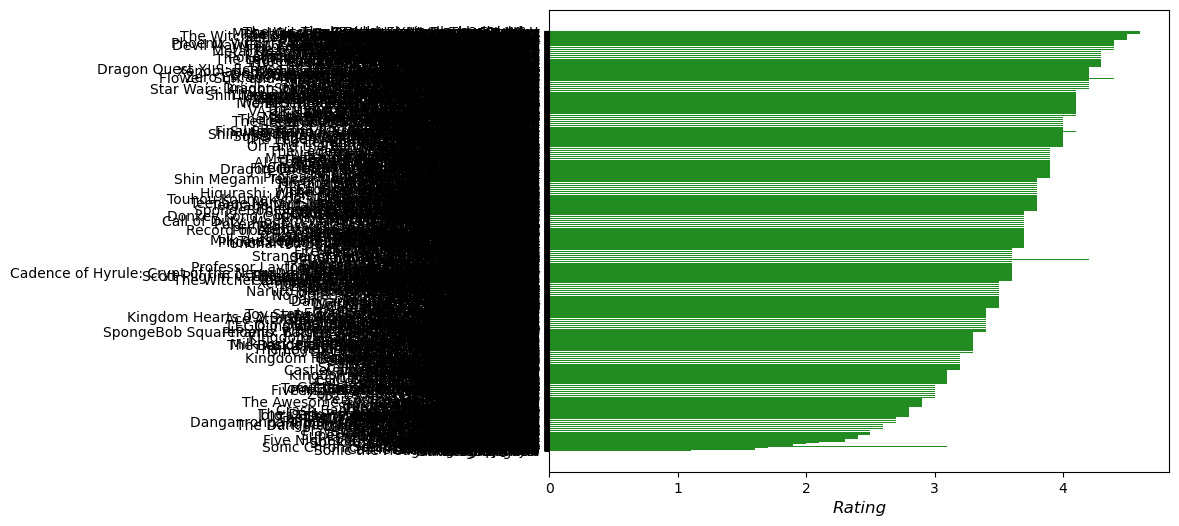

In [33]:
plt.figure(figsize=(8,6))

plt.barh(game_review_df.Title, game_review_df.Rating, color="forestgreen")


plt.xlabel("Rating", fontsize=12, fontstyle="italic")
#plt.title("", fontsize=16, fontweight="bold")


#plt.grid(axis="y", color="lightgrey", linestyle="--", alpha=0.5)

plt.show()